Insight 3: "The S&P 500 has more consistent returns, while Bitcoin shows extreme spikes, is this true?"

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

btc_data = pd.read_csv('./Data/btc_data_aligned_with_sp500.csv', encoding='cp1252')
sp500_data = pd.read_csv('./Data/sp500_data_aligned_with_btc_data.csv', encoding='cp1252')

btc_data['Date'] = pd.to_datetime(btc_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Rename the 'Close' columns for clarity
btc_data.rename(columns={"Close": "BTC_Price"}, inplace=True)
sp500_data.rename(columns={"Close": "SP500_Price"}, inplace=True)

# Merging datasets
merged_data = pd.merge(btc_data[['Date', 'BTC_Price']], sp500_data[['Date', 'SP500_Price']], on='Date', how='inner')
merged_data

,Date,BTC_Price,SP500_Price
0,2014-09-18,424.440002,2011.359985
1,2014-09-19,394.795990,2010.400024
2,2014-09-22,402.152008,1994.290039
3,2014-09-23,435.790985,1982.770020
4,2014-09-24,423.204987,1998.300049
...,...,...,...
2415,2024-04-24,64276.898438,5071.629883
2416,2024-04-25,64481.707031,5048.419922
2417,2024-04-26,63755.320313,5099.959961
2418,2024-04-29,63841.121094,5116.169922


In [2]:
# Calculate daily returns
merged_data['BTC_Daily_Return'] = merged_data['BTC_Price'].pct_change()
merged_data['SP500_Daily_Return'] = merged_data['SP500_Price'].pct_change()

# Calculate daily cumulative returns
merged_data['BTC_Cumulative_Return_Daily'] = (1 + merged_data['BTC_Daily_Return']).cumprod() - 1
merged_data['SP500_Cumulative_Return_Daily'] = (1 + merged_data['SP500_Daily_Return']).cumprod() - 1

In [3]:
# Calcular rendimientos acumulados mensuales
monthly_data = merged_data.resample('ME', on='Date').agg({
  'BTC_Daily_Return': lambda x: (1 + x).prod() - 1,
  'SP500_Daily_Return': lambda x: (1 + x).prod() - 1
}).reset_index()

monthly_data['BTC_Cumulative_Return_Monthly'] = (1 + monthly_data['BTC_Daily_Return']).cumprod() - 1
monthly_data['SP500_Cumulative_Return_Monthly'] = (1 + monthly_data['SP500_Daily_Return']).cumprod() - 1
monthly_data

,Date,BTC_Daily_Return,SP500_Daily_Return,BTC_Cumulative_Return_Monthly,SP500_Cumulative_Return_Monthly
0,2014-09-30,-0.088342,-0.019425,-0.088342,-0.019425
1,2014-10-31,-0.125659,0.023201,-0.202900,0.003326
2,2014-11-30,0.112692,0.024534,-0.113074,0.027941
3,2014-12-31,-0.149434,-0.004189,-0.245611,0.023636
4,2015-01-31,-0.292848,-0.031041,-0.466532,-0.008139
...,...,...,...,...,...
112,2024-01-31,0.011478,0.015896,99.326560,1.409141
113,2024-02-29,0.437169,0.051721,143.186181,1.533743
114,2024-03-31,0.155994,0.031019,165.678336,1.612337
115,2024-04-30,-0.097588,-0.026298,149.412593,1.543637


In [4]:
# Calculate annual cumulative returns
annual_data = merged_data.resample('YE', on='Date').agg({
  'BTC_Daily_Return': lambda x: (1 + x).prod() - 1,
  'SP500_Daily_Return': lambda x: (1 + x).prod() - 1
}).reset_index()

annual_data['BTC_Cumulative_Return_Yearly'] = (1 + annual_data['BTC_Daily_Return']).cumprod() - 1
annual_data['SP500_Cumulative_Return_Yearly'] = (1 + annual_data['SP500_Daily_Return']).cumprod() - 1
annual_data

,Date,BTC_Daily_Return,SP500_Daily_Return,BTC_Cumulative_Return_Yearly,SP500_Cumulative_Return_Yearly
0,2014-12-31,-0.245611,0.023636,-0.245611,0.023636
1,2015-12-31,0.344711,-0.007266,0.014435,0.016198
2,2016-12-31,1.232493,0.095350,1.264721,0.113093
3,2017-12-31,14.247213,0.194200,33.530676,0.329255
4,2018-12-31,-0.744634,-0.062373,7.817973,0.246346
5,2019-12-31,0.922034,0.288781,15.948448,0.606266
6,2020-12-31,3.031601,0.162589,67.329377,0.867428
7,2021-12-31,0.596679,0.268927,108.100097,1.369631
8,2022-12-31,-0.641463,-0.194428,38.116450,0.908907
9,2023-12-31,1.535714,0.242305,98.188112,1.371445


Graph for Daily, Monthly and Annual Cumulative Returns

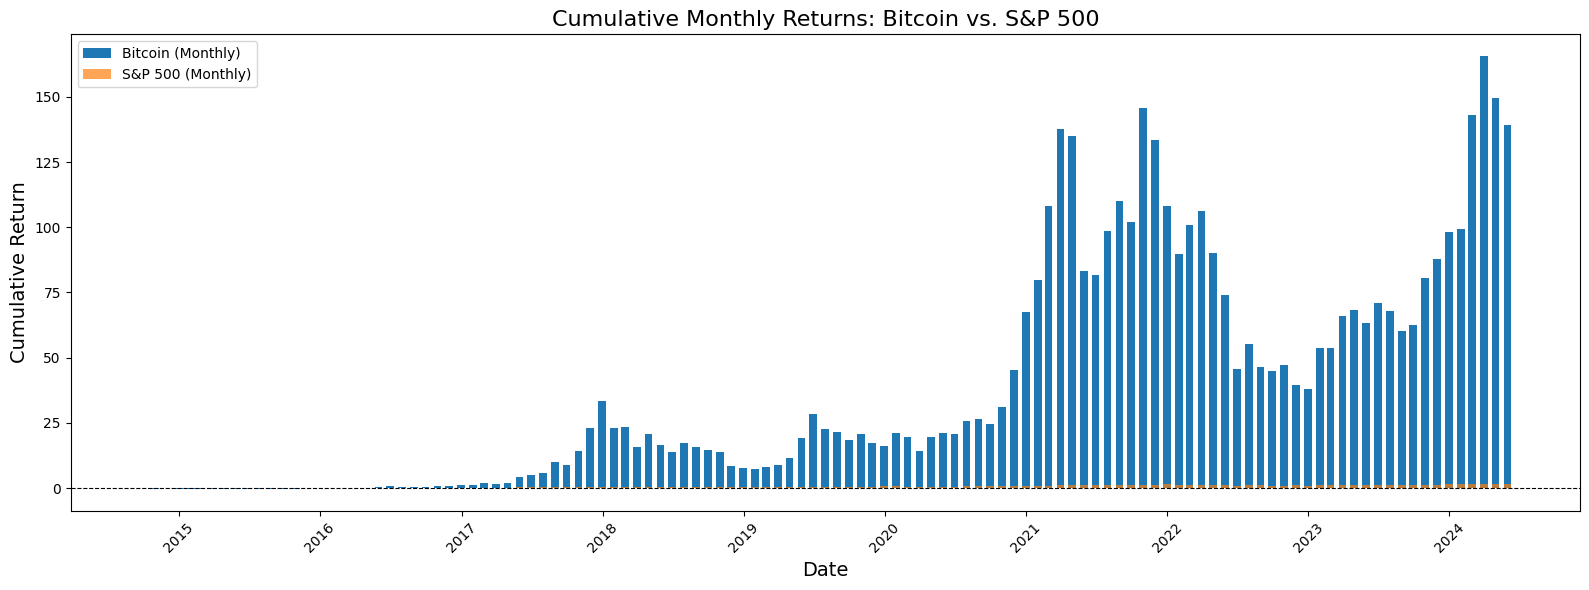

In [5]:
# Gráfica de barras para retornos acumulados mensuales
plt.figure(figsize=(16, 6))
plt.bar(monthly_data['Date'], monthly_data['BTC_Cumulative_Return_Monthly'], width=20, label='Bitcoin (Monthly)')
plt.bar(monthly_data['Date'], monthly_data['SP500_Cumulative_Return_Monthly'], width=20, label='S&P 500 (Monthly)', alpha=0.7)
plt.title('Cumulative Monthly Returns: Bitcoin vs. S&P 500', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return', fontsize=14)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Línea de referencia en 0
plt.xticks(rotation=45)  # Rotar fechas para mejor lectura
plt.legend()
plt.tight_layout()
plt.show()


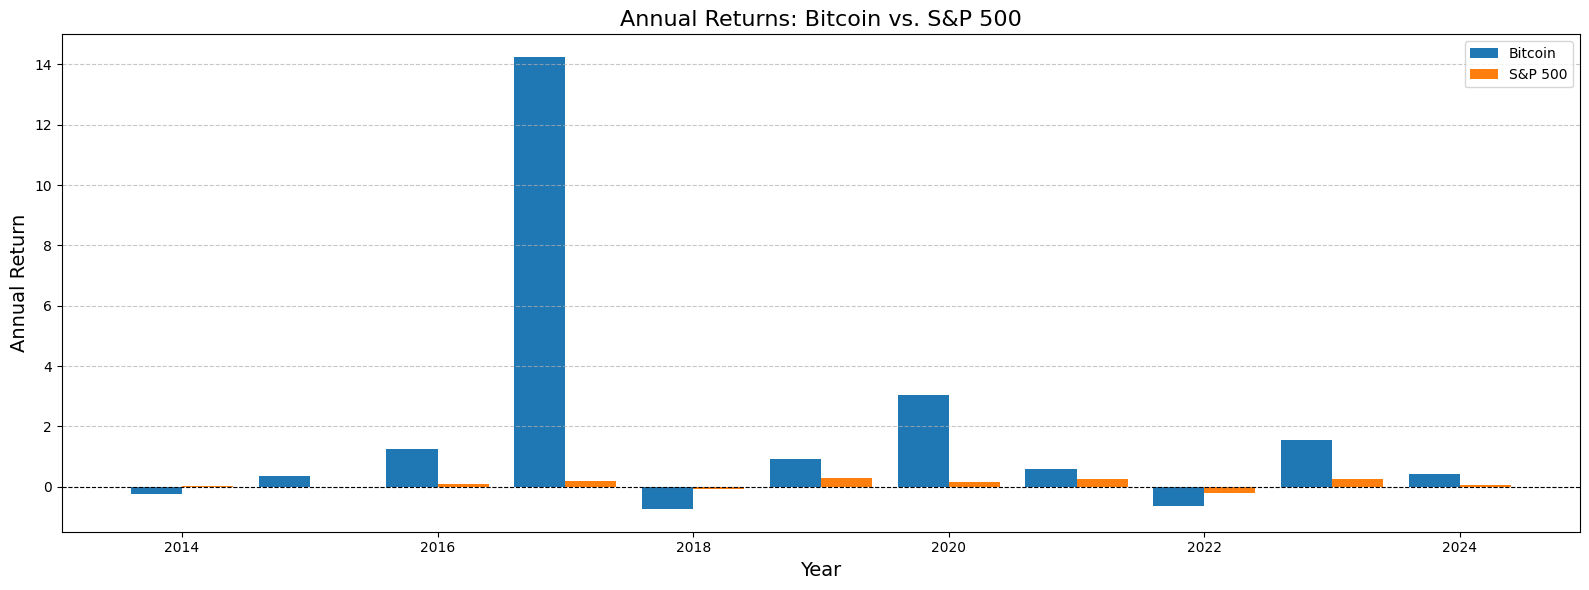

In [6]:
# Visualize annual returns for Bitcoin and S&P 500
plt.figure(figsize=(16, 6))
plt.bar(annual_data['Date'].dt.year - 0.2, annual_data['BTC_Daily_Return'], width=0.4, label='Bitcoin', align='center')
plt.bar(annual_data['Date'].dt.year + 0.2, annual_data['SP500_Daily_Return'], width=0.4, label='S&P 500', align='center')
plt.title('Annual Returns: Bitcoin vs. S&P 500', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Annual Return', fontsize=14)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Horizontal line at 0
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()